In [1]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
%cd 'gdrive/MyDrive/NLP Project/Round 2'

/content/gdrive/MyDrive/NLP Project/Round 2


In [3]:
%pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
%pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.6 MB 28.8 MB/s 
  Attempting uninstall: spacy
    Found existing installation: spacy 3.4.3
    Uninstalling spacy-3.4.3:
      Successfully uninstalled spacy-3.4.3


In [5]:
!python -m spacy download en_core_web_sm

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2022-12-16 17:16:02.541251: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 6.8 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [6]:
%pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Imports

In [7]:
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk import FreqDist, pos_tag
from wordcloud import WordCloud
from nltk.corpus import stopwords
import re
import numpy as np
from nltk.corpus import wordnet as wn
from collections import Counter
import spacy
from spacy import displacy
from collections import Counter
import pandas as pd

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [8]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [9]:
nlp = spacy.load("en_core_web_sm")

In [10]:
book_used = 1

## Reading the book

In [11]:
lines = ""
with open(f'book{book_used}.txt') as f:
    lines = f.readlines()
textString = ""
for line in lines:
  textString += line

## Simple preprocessing
This includes:
- Removing ASCII Characters (Removing images, emojis, etc)
- Removing chapter names
- Removing running sections
- Removing page numbers
- Removing subtext of figures
- Removing punctuations
- Removing new lines
- Removing extra spaces
- Converting text to lowercase

In [12]:
textString = re.sub(r'[^\x00-\x7f]', " ", textString)
if book_used == 1:
  textString = re.sub( "\n[Cc]hapter \d+\n[^\n]+\n" , " ", textString)
  textString = re.sub( "\n[0-9]+-[0-9]+\n[^\n]+\n" , " ", textString)
elif book_used == 2:
  textString = re.sub( "\nCHAP. [0-9]+\n" , "", textString)
  textString = re.sub( "\nSEC. [0-9]+.[0-9]+\n" , "", textString)
textString = re.sub( "\n[0-9]+\n" , " ", textString)
textString = re.sub( "[Ff]igure [0-9]+-[0-9]+" , " ", textString)
textString = re.sub( "[Ff]ig. [0-9]+-[0-9]+" , " ", textString)
textString = re.sub("""[^\w\s]""", " ", textString)
textString = re.sub('\n', ' ', textString)
textString = re.sub('[ ][0-9]+[ ]', ' ', textString)
textString = re.sub('[ ]\d[ ]', ' ', textString)
textString = re.sub('  ', ' ', textString)
textString2 = textString.lower()

## Saving the preprocessed book

In [13]:
with open(f'book{book_used}simpleProcessed_1.txt', 'w') as f:
    f.write(textString2)
with open(f'book{book_used}simpleProcessed_11.txt', 'w') as f:
    f.write(textString)

In [14]:
lines2 = ""
with open(f'book{book_used}simpleProcessed_11.txt') as f:
    lines2 = f.readlines()
data2 = ""
for line in lines2:
  data2 += line

In [15]:
lines = ""
with open(f'book{book_used}simpleProcessed_1.txt') as f:
    lines = f.readlines()
data = ""
for line in lines:
  data += line

## Tokenize the text

In [16]:
data_token = word_tokenize(data)
data_token2 = word_tokenize(data2)

## Removal of stopwords from the text

In [17]:
stop_words = stopwords.words('english')
data_stopwords_token = [word for word in data_token if not word in stop_words]
data_stopwords = " ".join(data_stopwords_token)
data_stopwords_token2 = [word for word in data_token2 if not word in stop_words]
data_stopwords2 = " ".join(data_stopwords_token2)

## Saving the book without stopwords

In [18]:
with open(f'book{book_used}simpleProcessed_2.txt', 'w') as f:
    f.write(data_stopwords)

with open(f'book{book_used}simpleProcessed_21.txt', 'w') as f:
    f.write(data_stopwords2)

## POS Tagging of the text

In [19]:
data_tag = pos_tag(data_stopwords_token)

## Print:
- Total number of tokens
- Number of "Noun" tagged tokens
- Number of "Verb" tagged tokens

In [20]:
print(len(data_stopwords_token))
nouns11=[token for token,pos in pos_tag((data_stopwords_token)) if pos.startswith('N')]
print(len(nouns11))
verb11=[token for token,pos in pos_tag((data_stopwords_token)) if pos.startswith('V')]
print(len(verb11))

132965
71661
25769


## Syntatic Labelling of the text

In [21]:
def synset(words):
    categories=[]
    for word in words:
        cat=[]
        for synset in wn.synsets(word):
            if('noun' in synset.lexname()):
                cat.append(synset.lexname())
            if ('verb' in synset.lexname()):
                cat.append(synset.lexname())
        categories.append(cat)
    return categories

In [22]:
def all_synsets (no,ve):
    nouns=[]
    verbs=[]
    for word in no:
        for synset in wn.synsets (word):
            if(('noun' in synset.lexname()) & ('Tops' not in synset.lexname()) ):
                nouns.append(synset.lexname())
            if('verb' in synset.lexname()):
                verbs.append(synset.lexname())
    for word in ve:
        for synset in wn.synsets (word):
            if(('noun' in synset.lexname()) & ('Tops' not in synset.lexname()) ):
                nouns.append(synset.lexname())
            if('verb' in synset.lexname()):
                verbs.append(synset.lexname())

    return nouns, verbs

In [23]:
noun_syn,verb_syn=all_synsets(nouns11,verb11)

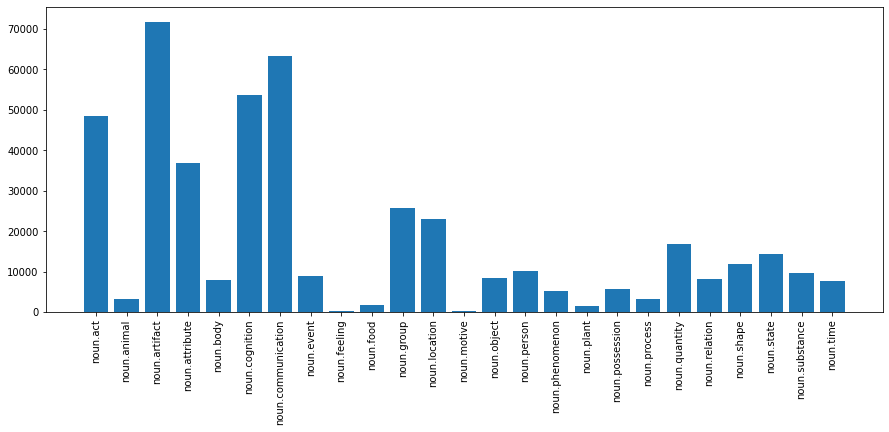

In [24]:
labels_n, counts_n= np.unique (noun_syn, return_counts=True)
ticks =range(len(counts_n))
plt.figure(figsize=(15,8))
plt.bar(labels_n, counts_n, align='center')
plt.xticks(rotation = 90)
plt.subplots_adjust(bottom = 0.35)
plt.show()

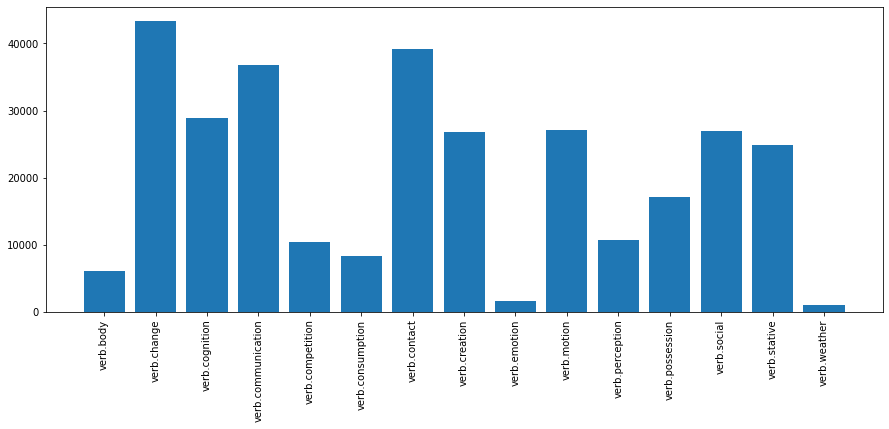

In [25]:
labels_v, counts_v = np.unique (verb_syn, return_counts=True)
ticks1 =range(len(counts_v))
plt.figure(figsize=(15,8))
plt.bar(labels_v, counts_v, align='center')
plt.xticks(rotation = 90)
plt.subplots_adjust(bottom = 0.35)
plt.show()

## Entity Recognition

In [26]:
nlp = spacy.load("en_core_web_sm")
doc1= nlp(data_stopwords[:50000])
print(f"{str(len(doc1.ents))} entities exists in book{book_used}")

314 entities exists in book1


In [27]:
def entity_recognition(text):
    doc=nlp(text)
    person=[]
    org=[]
    location=[]
    for X in doc:
        if (X.ent_type_ == 'PERSON') and X.text not in person:
            person.append(X.text)
        if (X.ent_type_=='ORG') and X.text not in org:
            org.append(X.text)
        if ((X.ent_type_ =='LOC') or (X.ent_type_== 'CPE')) and X. text not in location:
            location.append(X.text)
    return person, org, location

In [28]:
person1,org1, location1=entity_recognition (data_stopwords[:50000])

print(f"Number of \"person\" entities in book{book_used} = {str(len(person1))}")
print(f"Number of \"organization\" entities in book{book_used} = {str(len(org1))}")
print(f"Number of \"location\" entities in book{book_used} = {str(len(location1))}")
print("\nOrganizations: ")
for i, org in enumerate(org1):
  print(f"{i+1} -> {org}", end="; ")

Number of "person" entities in book1 = 112
Number of "organization" entities in book1 = 115
Number of "location" entities in book1 = 0

Organizations: 
1 -> xvii; 2 -> dda; 3 -> algorithm; 4 -> bresenham; 5 -> line; 6 -> parallel; 7 -> polygon; 8 -> fill; 9 -> rgb; 10 -> linear; 11 -> courtesy; 12 -> intergraph; 13 -> corporation; 14 -> circuit; 15 -> mechanical; 16 -> dynamics; 17 -> inc; 18 -> illinois; 19 -> urbana; 20 -> champaign; 21 -> caterpillar; 22 -> operator; 23 -> view; 24 -> chapter; 25 -> chrysler; 26 -> los; 27 -> alamos; 28 -> national; 29 -> laboratory; 30 -> ii; 31 -> ltd; 32 -> visuals; 33 -> thomson; 34 -> digital; 35 -> image; 36 -> hotel; 37 -> gould; 38 -> imaging; 39 -> wacom; 40 -> technology; 41 -> joan; 42 -> truckenbrod; 43 -> school; 44 -> art; 45 -> institute; 46 -> minneapolis; 47 -> college; 48 -> design; 49 -> hanson; 50 -> department; 51 -> computer; 52 -> science; 53 -> indiana; 54 -> university; 55 -> tronic; 56 -> vertigo; 57 -> dis; 58 -> ac; 59 ->

In [29]:
def freq(str_list):
    unique_words =set(str_list)
    counts= {}
    for words in unique_words :
        counts[words]= str_list.count(words)
    return counts

In [30]:
X=freq(person1)
print(sorted(X.items(), key =lambda kv: (kv[1], kv[0]), reverse=True))
X=freq(location1)
print(sorted(X.items(), key =lambda kv: (kv[1], kv[0]), reverse=True))

[('williams', 1), ('william', 1), ('w', 1), ('van', 1), ('uselton', 1), ('urbana', 1), ('university', 1), ('tistical', 1), ('time', 1), ('tel', 1), ('tan', 1), ('tablet', 1), ('supercomputer', 1), ('stephen', 1), ('stephanie', 1), ('sta', 1), ('smith', 1), ('small', 1), ('simpson', 1), ('siegel', 1), ('sides', 1), ('scripps', 1), ('sandwell', 1), ('san', 1), ('sam', 1), ('saint', 1), ('rourke', 1), ('quek', 1), ('prueitt', 1), ('programs', 1), ('prieur', 1), ('polygon', 1), ('pins', 1), ('pee', 1), ('paul', 1), ('paint', 1), ('os', 1), ('nicholl', 1), ('nicholas', 1), ('ncsc', 1), ('mm', 1), ('mike', 1), ('melvin', 1), ('mcleod', 1), ('mathematical', 1), ('mathematica', 1), ('marialine', 1), ('lyon', 1), ('lumena', 1), ('liang', 1), ('li', 1), ('lekson', 1), ('lee', 1), ('landreth', 1), ('l', 1), ('krogh', 1), ('kochanek', 1), ('kim', 1), ('khan', 1), ('johnson', 1), ('john', 1), ('jim', 1), ('jeffery', 1), ('jeff', 1), ('jay', 1), ('institution', 1), ('inc', 1), ('horizontal', 1), ('h

## Performance Evaluation

In [59]:
selText1='We have a highly realistic image taken from a reconstruction of thirteenth century Dadu now Beijing for a Japanese broadcast'
selText2='A Van Gogh look alike created by graphics artist Elizabeth Rourke with a cordless pressure sensitive stylus'

In [60]:
selLabel1=['O','O','O','O','O','PRODUCT','O','O','O','O','O','DATE','DATE','GPE','O','GPE','O','O','NORP','O']
selLabel2=['O','PERSON','PERSON','PRODUCT','PRODUCT','O','O','O', 'O', 'PERSON','PERSON','O','O','O','O','O','']

In [61]:
print(len(word_tokenize(selText1)))
print(len(selLabel1))
print(len(word_tokenize(selText2)))
print(len(selLabel2))

20
20
17
17


In [62]:
doc1 = nlp(selText1)
predLabel1= [word.ent_type_ for word in doc1]

In [64]:
print(len(selLabel1))
print(len(predLabel1))
print(predLabel1)

20
20
['', '', '', '', '', '', '', '', '', '', '', 'DATE', 'DATE', '', '', 'GPE', '', '', 'NORP', '']


In [65]:
doc2 = nlp(selText2)
predLabel2= [word.ent_type_ for word in doc2]

In [67]:
print(len(selLabel2))
print(len(predLabel2))
print(predLabel2)

17
17
['', 'PERSON', 'PERSON', '', '', '', '', '', '', 'PERSON', 'PERSON', '', '', '', '', '', '']


In [68]:
predLabelFinal1 = predLabel1.copy()
for x in range(len(predLabel1)):
    if (predLabel1[x]=='') or (predLabel1[x] not in ['ORG', 'LOC', 'GPE', 'PERSON']):
        predLabelFinal1[x] = 'O'

In [69]:
print(predLabelFinal1)

['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'GPE', 'O', 'O', 'O', 'O']


In [70]:
predLabelFinal2 = predLabel2.copy()
for x in range(len(predLabel2)):
    if (predLabel2[x]=='') or (predLabel2[x] not in ['ORG', 'LOC', 'GPE', 'PERSON']):
        predLabelFinal2[x] = 'O'

In [71]:
print(predLabelFinal2)

['O', 'PERSON', 'PERSON', 'O', 'O', 'O', 'O', 'O', 'O', 'PERSON', 'PERSON', 'O', 'O', 'O', 'O', 'O', 'O']


In [72]:
confusionMatrix = {"TP":0, "TN":0, "FP":0, "FN":0}
for i, trueLabel in enumerate(selLabel1):
  if ((trueLabel == 'O') and (predLabelFinal1[i] == trueLabel)):
    confusionMatrix["TN"] += 1
  if ((trueLabel == 'O') and (predLabelFinal1[i] != 'O') and (predLabelFinal1[i] != trueLabel)):
    confusionMatrix["FP"] += 1
  if ((trueLabel != 'O') and (predLabelFinal1[i] == trueLabel)):
    confusionMatrix["TP"] += 1
  if ((trueLabel != 'O') and (predLabelFinal1[i] == 'O')) or ((trueLabel != 'O') and (predLabelFinal1[i] != 'O') and (predLabelFinal1[i] != trueLabel)):
    confusionMatrix["FN"] += 1

In [73]:
for i, trueLabel in enumerate(selLabel2):
  if ((trueLabel == 'O') and (predLabelFinal2[i] == trueLabel)):
    confusionMatrix["TN"] += 1
  if ((trueLabel == 'O') and (predLabelFinal2[i] != 'O') and (predLabelFinal2[i] != trueLabel)):
    confusionMatrix["FP"] += 1
  if ((trueLabel != 'O') and (predLabelFinal2[i] == trueLabel)):
    confusionMatrix["TP"] += 1
  if ((trueLabel != 'O') and (predLabelFinal2[i] == 'O')) or ((trueLabel != 'O') and (predLabelFinal2[i] != 'O') and (predLabelFinal2[i] != trueLabel)):
    confusionMatrix["FN"] += 1

In [74]:
print(confusionMatrix)

{'TP': 5, 'TN': 24, 'FP': 0, 'FN': 8}


In [75]:
accuracy = (confusionMatrix["TP"]+confusionMatrix["TN"])/(confusionMatrix["TP"]+confusionMatrix["TN"]+confusionMatrix["FP"]+confusionMatrix["FN"])

In [76]:
recall = (confusionMatrix["TP"])/(confusionMatrix["TP"]+confusionMatrix["FN"])

In [77]:
precission = (confusionMatrix["TP"])/(confusionMatrix["TP"]+confusionMatrix["FP"])

In [78]:
f1_score = (2*recall*precission)/(recall+precission)

In [88]:
print(f'Accuracy -> {accuracy}')
print(f'Recall -> {recall}')
print(f'Precision -> {precission}')
print(f'F1-Score -> {f1_score}')

Accuracy -> 0.7837837837837838
Recall -> 0.38461538461538464
Precision -> 1.0
F1-Score -> 0.5555555555555556


## Extracting relationships between entitites from the book

In [83]:
doc2= nlp(data_stopwords2[:50000])
featureMat = []
for token in doc2:
    if(token.ent_type_!=""):
        featureMat.append([token.text, token.lemma_, token.tag_, token.shape_, token.is_alpha, token.ent_iob_, token.ent_type_])
    

In [84]:
df = pd.DataFrame(featureMat, columns =["Text", "Lemma", "POS Tag", "Shape", "Is Alpha", "Entity IOB", "Entity Type"])

In [86]:
df.head(50)

,Text,Lemma,POS Tag,Shape,Is Alpha,Entity IOB,Entity Type
0,Survey,Survey,NNP,Xxxxx,True,B,ORG
1,Computer,Computer,NNP,Xxxxx,True,I,ORG
2,Graphics,Graphics,NNPS,Xxxxx,True,I,ORG
3,Computer,Computer,NNP,Xxxxx,True,I,ORG
4,Aided,aid,VBD,Xxxxx,True,I,ORG
5,Design,Design,NNP,Xxxxx,True,I,ORG
6,Presentation,Presentation,NNP,Xxxxx,True,I,ORG
7,Graphics,Graphics,NNPS,Xxxxx,True,I,ORG
8,Computer,Computer,NNP,Xxxxx,True,I,ORG
9,Art,Art,NNP,Xxx,True,I,ORG
